In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

# 1 `steam_reviews.csv`

## 1.1 Load data

In [3]:
steam_review = pd.read_csv('steam_reviews.csv')

In [4]:
steam_review.columns

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [5]:
## Drop columns 
############################## To be discussed ##############################
drop_columns = ['Unnamed: 0',
                #'review_id', 'timestamp_created', 'timestamp_updated', 
                #'steam_purchase', 'received_for_free', 
                #'written_during_early_access', 'author.last_played'
               ]
steam_review = steam_review.drop(drop_columns, axis=1)

In [6]:
steam_review.shape[0]

21747371

In [7]:
## Select only English, and drop the English column
steam_review = steam_review[steam_review.language=='english']
steam_review = steam_review.drop('language', axis=1)

In [8]:
steam_review.shape[0]

9635437

## 1.2 Check data

### NA and empty values

In [9]:
print(steam_review.isnull().sum())
steam_review.dropna(axis=0, inplace=True)

app_id                                0
app_name                              0
review_id                             0
review                            16750
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review         11847
author.last_played                    2
dtype: int64


In [10]:
steam_review.shape[0]

9606842

### Duplicate rows

In [11]:
## Check duplicate rows
any(steam_review.duplicated())

True

In [12]:
steam_review.drop_duplicates(inplace=True)

In [13]:
any(steam_review.duplicated(['review_id']))

False

In [14]:
steam_review.shape[0]

9552156

In [15]:
#steam_review.to_csv('steam_review_clean.csv', index=False)

## 1.3 Filter games and users $\geq$ threshold

In [16]:
n=1
m=1

N=10
M=500

steam_review_1 = steam_review

while n<N or m<M:
    ## Keep users who have enough reviews
    group_user = steam_review_1['review_id'].groupby(steam_review_1['author.steamid']).size()
    user_list = list(group_user[group_user>=N].index) # enough = one user need to have N reviews
    steam_review_1 = steam_review_1[(steam_review_1['author.steamid'].isin(user_list))]
    
    ## Keep games who have enough users
    group_game = steam_review_1['author.steamid'].groupby(steam_review_1['app_id']).size()
    game_list = list(group_game[group_game>=M].index) # enough = one game need to have M users
    steam_review_1 = steam_review_1[(steam_review_1['app_id'].isin(game_list))]

    n = min(steam_review_1['review_id'].groupby(steam_review_1['author.steamid']).size()) # user ~ review
    m = min(steam_review_1['author.steamid'].groupby(steam_review_1['app_id']).size()) # game ~ user

<hr>

# 2 `steam_games.csv`

## 2.1 Load data

In [17]:
steam_game = pd.read_csv('steam_games.csv')

## 2.2 Clean data

#### Check duplicate rows

In [18]:
any(steam_game.duplicated())

False

#### NA values

In [19]:
#print(steam_game.shape)
#print(steam_game.isnull().sum())
#steam_game.dropna(axis=0, inplace=True)
#print(steam_game.shape)

## 2.3 Column by column

In [20]:
steam_game.columns

Index(['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews',
       'release_date', 'developer', 'publisher', 'popular_tags',
       'game_details', 'languages', 'achievements', 'genre',
       'game_description', 'mature_content', 'minimum_requirements',
       'recommended_requirements', 'original_price', 'discount_price'],
      dtype='object')

### (1) `url` -> `app_id`: Url of the game -> app of the game

##### Extract app_id information from URL

In [21]:
expand_url = steam_game['url'].str.split('/', expand=True)
expand_url.head(3)

,0,1,2,3,4,5,6
0,https:,,store.steampowered.com,app,379720,DOOM,
1,https:,,store.steampowered.com,app,578080,PLAYERUNKNOWNS_BATTLEGROUNDS,
2,https:,,store.steampowered.com,app,637090,BATTLETECH,


In [22]:
steam_game['app_id'] = expand_url.iloc[:,4]

##### Delete NA app_id

In [23]:
## Check NA
steam_game[steam_game['app_id'].isnull().T]

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,app_id
704,https://store.steampowered.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$29.99,$23.99,None


In [24]:
## Delete NA
steam_game.dropna(subset=['app_id'], inplace=True)

##### Delete empty app_id

In [25]:
## Check empty value
steam_game[steam_game.app_id=='']

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,app_id
35169,https://store.steampowered.com/digitalgiftcards/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [26]:
## Delete empty value
steam_game.drop(axis=0, index=35169, inplace=True)

##### Change type to int

In [27]:
steam_game['app_id'] = steam_game['app_id'].astype('int')

### (2) `type`: app or bundle, delete bundles

##### Check the bundle data and delete the column 'type'

In [28]:
steam_game[steam_game['types']=='bundle'].head(1)

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,app_id
5,https://store.steampowered.com/bundle/5699/Gra...,bundle,Grand Theft Auto V: Premium Online Edition,Grand Theft Auto V: Premium Online Edition bundle,NaN,NaN,NaN,Rockstar North,Rockstar Games,NaN,"Single-player,Multi-player,Downloadable Conten...","English, French, Italian, German, Spanish - Sp...",NaN,"Action,Adventure",NaN,NaN,NaN,NaN,NaN,$35.18,5699


In [29]:
steam_game = steam_game[steam_game.types == 'app']

In [30]:
steam_game.drop('types', axis=1, inplace=True)

##### Check and delete duplicate values in app

In [31]:
df = steam_game.groupby(['app_id']).size()
col = df[df>1].reset_index()[['app_id']]
pd.merge(col, steam_game, on=['app_id'])

,app_id,url,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,200260,https://store.steampowered.com/app/200260/Batm...,Batman: Arkham City - Game of the Year Edition,Get Batman: Arkham City and all DLC for one lo...,"Very Positive,(161),- 91% of the 161 user revi...","Very Positive,(17,335),- 94% of the 17,335 use...","Sep 7, 2012","Rocksteady Studios,Feral Interactive (Mac)","Warner Bros. Interactive Entertainment,Feral I...","Action,Batman,Open World,Stealth,Adventure,Thi...","Single-player,Steam Achievements,Steam Trading...","English,French,German,Italian,Polish,Portugues...",64.0,"Action,Adventure",About This Game Batman: Arkham City builds up...,NaN,NaN,NaN,$19.99,NaN
1,200260,https://store.steampowered.com/app/200260,Batman: Arkham City - Game of the Year Edition,Get Batman: Arkham City and all DLC for one lo...,"Very Positive,(161),- 91% of the 161 user revi...","Very Positive,(17,335),- 94% of the 17,335 use...","Sep 7, 2012","Rocksteady Studios,Feral Interactive (Mac)","Warner Bros. Interactive Entertainment,Feral I...","Action,Batman,Open World,Stealth,Adventure,Thi...","Single-player,Steam Achievements,Steam Trading...","English,French,German,Italian,Polish,Portugues...",64.0,"Action,Adventure",About This Game Batman: Arkham City builds up...,NaN,NaN,NaN,$19.99,NaN


In [32]:
steam_game = steam_game[steam_game.url != 'https://store.steampowered.com/app/200260']

### (3) `recent_reviews` and `all_reviews`

In [33]:
steam_game['recent_reviews'][0]

'Very Positive,(554),- 89% of the 554 user reviews in the last 30 days are positive.'

In [34]:
steam_game['recent_reviews_type'] = steam_game['recent_reviews'].str.split(',', expand=True)[0]
steam_game['recent_reviews_number'] = steam_game['recent_reviews'].str.split(',', expand=True)[1].str.split('(', expand=True)[1].str.split(')', expand=True)[0]
steam_game['recent_reviews_pct'] = steam_game['recent_reviews'].str.split('- ', expand=True)[1].str.split('%', expand=True)[0]

In [35]:
steam_game['all_reviews_type'] = steam_game['all_reviews'].str.split(',', expand=True)[0]
steam_game['all_reviews_number'] = steam_game['all_reviews'].str.split(',', expand=True)[1].str.split('(', expand=True)[1].str.split(')', expand=True)[0]
steam_game['all_reviews_pct'] = steam_game['all_reviews'].str.split('- ', expand=True)[1].str.split('%', expand=True)[0]

In [36]:
steam_game.shape[0]

38020

# 3 Merge

## 3.1 Merge

In [37]:
steam = pd.merge(left=steam_review_1, right=steam_game, how='inner', on='app_id')

In [38]:
steam.shape[0]

704304

## 3.2 Re-Check

In [39]:
steam = steam[steam.review != '']

In [40]:
steam.shape[0]

704304

## 3.3 Re-examine users and games $\geq$ threshold

In [41]:
n=1
m=1

N=15
M=500

steam_1 = steam

while n<N or m<M:
    ## Keep users who have enough reviews
    group_user = steam_1['review_id'].groupby(steam_1['author.steamid']).size()
    user_list = list(group_user[group_user>=N].index) # enough = one user need to have N reviews
    steam_1 = steam_1[(steam_1['author.steamid'].isin(user_list))]
    
    ## Keep games who have enough users
    group_game = steam_1['author.steamid'].groupby(steam_1['app_id']).size()
    game_list = list(group_game[group_game>=M].index) # enough = one game need to have M users
    steam_1 = steam_1[(steam_1['app_id'].isin(game_list))]

    n = min(steam_1['review_id'].groupby(steam_1['author.steamid']).size()) # user ~ review
    m = min(steam_1['author.steamid'].groupby(steam_1['app_id']).size()) # game ~ user

In [42]:
steam_1.shape[0]

206997

#### Check

##### Count

In [43]:
steam_1['review_id'].groupby(steam_1['author.steamid']).size().describe()

count    10525.000000
mean        19.667173
std          5.789372
min         15.000000
25%         16.000000
50%         18.000000
75%         21.000000
max        103.000000
Name: review_id, dtype: float64

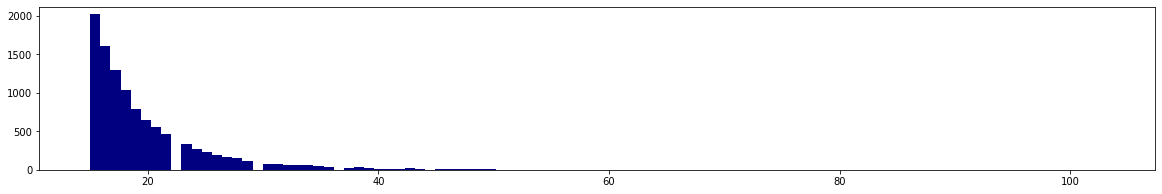

In [44]:
plt.figure(figsize=(20, 3))
plt.hist(steam_1['review_id'].groupby(steam_1['author.steamid']).size(), bins=100, facecolor='#000080')
plt.show()

In [45]:
steam_1['author.steamid'].groupby(steam_1['app_id']).size().describe()

count     136.000000
mean     1522.036765
std      1002.748869
min       500.000000
25%       815.750000
50%      1236.000000
75%      1787.500000
max      5094.000000
Name: author.steamid, dtype: float64

##### Unique values

In [46]:
len(steam_1['review_id'].unique())

206997

In [47]:
len(steam_1['author.steamid'].unique())

10525

In [48]:
len(steam_1['app_id'].unique())

136

# 4 Clean processed data

In [49]:
steam_1.drop(['app_name', 'recent_reviews', 'all_reviews'], axis=1, inplace=True)

In [50]:
import time, datetime

def stamp_to_time(stamp):
    result = []
    for time_stamp in stamp:
        date_time = datetime.datetime.utcfromtimestamp(time_stamp)
        result.append(date_time.strftime("%Y-%m-%d %H:%M:%S"))
    return result

steam_1['datetime_created'] = stamp_to_time(steam_1.timestamp_created)
steam_1['datetime_created'] = pd.to_datetime(steam_1['datetime_created'])

steam_1['datetime_updated'] = stamp_to_time(steam_1.timestamp_updated)
steam_1['datetime_updated'] = pd.to_datetime(steam_1['datetime_updated'])

steam_1.drop(['timestamp_created', 'timestamp_updated'], axis=1, inplace=True)

In [51]:
order = ['review_id', 'review', 'app_id', 'name', 'url', 'author.steamid', 'recommended',
         'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
         'datetime_created', 'datetime_updated',
         'steam_purchase', 'received_for_free', 'original_price', 'discount_price',
         'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 
         'author.playtime_last_two_weeks', 'author.playtime_at_review', 'author.last_played', 
         'written_during_early_access',
         'release_date', 'developer', 'publisher',
         'desc_snippet', 'game_description', 
         'genre', 'popular_tags', 'game_details',
         'languages', 'achievements',   'mature_content',
         'minimum_requirements', 'recommended_requirements',
         'recent_reviews_type', 'recent_reviews_number', 'recent_reviews_pct',
         'all_reviews_type', 'all_reviews_number', 'all_reviews_pct']
steam_1 = steam_1[order]

In [52]:
steam_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206997 entries, 0 to 703261
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   review_id                       206997 non-null  int64         
 1   review                          206997 non-null  object        
 2   app_id                          206997 non-null  int64         
 3   name                            206997 non-null  object        
 4   url                             206997 non-null  object        
 5   author.steamid                  206997 non-null  int64         
 6   recommended                     206997 non-null  bool          
 7   votes_helpful                   206997 non-null  int64         
 8   votes_funny                     206997 non-null  int64         
 9   weighted_vote_score             206997 non-null  float64       
 10  comment_count                   206997 non-null  int64  

In [53]:
steam_1.isnull().sum()

review_id                              0
review                                 0
app_id                                 0
name                                   0
url                                    0
author.steamid                         0
recommended                            0
votes_helpful                          0
votes_funny                            0
weighted_vote_score                    0
comment_count                          0
datetime_created                       0
datetime_updated                       0
steam_purchase                         0
received_for_free                      0
original_price                         0
discount_price                     85366
author.num_games_owned                 0
author.num_reviews                     0
author.playtime_forever                0
author.playtime_last_two_weeks         0
author.playtime_at_review              0
author.last_played                     0
written_during_early_access            0
release_date    

# 5 Output

In [54]:
steam_1.to_csv('steam_cleaned.csv')

<hr>

# Less columns

In [55]:
col_2 = ['review_id', 'review', 'app_id', 'name', 'url', 'author.steamid', 'recommended',
         'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
         'datetime_created', 'datetime_updated',
         'steam_purchase', 'received_for_free', 'original_price', 'discount_price',
         'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 
         'author.playtime_last_two_weeks', 'author.playtime_at_review', 'author.last_played', 
         'written_during_early_access',
         'developer',
         'desc_snippet', 'game_description', 
         'genre', 'popular_tags', 'game_details',
         'languages']
steam_2 = steam_1[col_2]

In [56]:
steam_2.to_csv('steam_cleaned_less.csv')

In [57]:
steam_2.shape

(206997, 31)